# 12. Garden groups

How many fences do you need to fence the gardens?

Price of fence is: $\text{area of plant} \cdot \text{number of fences}$
Price of fence on part 2 is: $\text{area of plant} \cdot \text{number of sides that field has}$

Also, to clarify, **price for each region is counted separately**!

In [39]:
import numpy as np
import matplotlib.pyplot as plt


def direction(i):
    return np.array([np.round(np.sin(np.pi * i * 1/2)), np.round(np.cos(np.pi * i * 1/2))], dtype = int)

def FenceCounter(coordinate):
    fenceCount = 0
    for i in range(0, 4):
        xc, yc = coordinate
        xi, yi = np.array(coordinate) + direction(i)

        if 0 <= xi < len(data) and 0 <= yi < len(data[0]): # Check if cout of bounds
            if data[xc][yc] == data[xi][yi]:
                continue

        fenceCount += 1

    return fenceCount

def AreaFinder(x, y, visited = set(), edgesFound = set()):
    if (x, y) in visited:
        return visited, edgesFound
    visited.add((x, y))

    for i in range(0, 4):
        xi, yi = np.array([x, y]) + direction(i)

        if not (0 <= xi < len(data) and 0 <= yi < len(data[0])): # Check if out of bounds
            edgesFound.add((x, y, i)) # Store on which side a fence was found
            continue

        if data[x][y] == data[xi][yi]: # Check if next plant is same as current one           
            vis, edges = AreaFinder(xi, yi, visited, set())
            visited.update(vis)
            edgesFound.update(edges)
        else:
            edgesFound.add((x, y, i)) # Store on which side a fence was found

    return visited, edgesFound # Return set of all visited cells

data = [[cell for cell in line.strip("\n")] for line in open("test.txt").readlines()]


AllVisitedCells = set()
FencePrice1 = 0
FencePrice2 = 0

for x in range(len(data)):
    for y in range(len(data[0])):
        if (x, y) not in AllVisitedCells:
            explored, edgesFound = AreaFinder(x, y, set(), set()) # its co'uicial to create new sets because otherwise they dont get cleared between calls!
            
            ### PART 1 ###
            FencePrice1 += len(explored) * len(edgesFound)
                        
            AllVisitedCells.update(explored) 

print("Part 1", FencePrice1)
print("Part 2", FencePrice2)


Part 1 1930
Part 2 0


Much better Idea:
1. Get all regions
2. Convert each region to 1 and outside a region to 0
3. Convolve horizontally, vertaaylly -> number of fences
4. Convolve diagonally -> number of corners = number of sides
   

Part 1: 1452678
Part 2: 873584


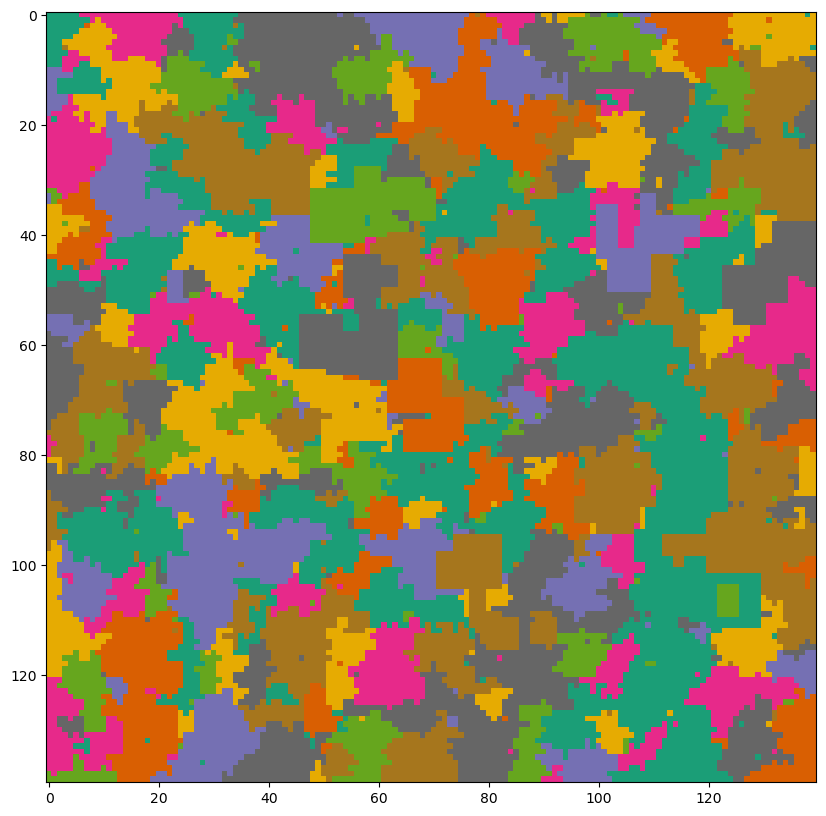

In [36]:
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

def direction(i):
    return np.array([np.round(np.sin(np.pi * i * 1/2)), np.round(np.cos(np.pi * i * 1/2))], dtype = int)

def AreaFinder(x, y, visited = set()):
    if (x, y) in visited:
        return visited
    visited.add((x, y))

    for i in range(0, 4):
        xi, yi = np.array([x, y]) + direction(i)

        if (0 <= xi < len(data) and 0 <= yi < len(data[0])): # Check if out of bounds
            if data[x][y] == data[xi][yi]: # Check if next plant is same as current one           
                visited.update(AreaFinder(xi, yi, visited))

    return visited # Return set of all visited cells

data = [[cell for cell in line.strip("\n")] for line in open("input.txt").readlines()]

AllVisitedCells = set()
CellGroups = []

FencePrice1 = 0
FencePrice2 = 0

for x in range(len(data)):
    for y in range(len(data[0])):
        if (x, y) not in AllVisitedCells:
            explored = AreaFinder(x, y, set()) # its co'uicial to create new sets because otherwise they dont get cleared between calls!
            AllVisitedCells.update(explored)
            
            process = np.zeros((len(data), len(data[0])))
            process[tuple(zip(*explored))] = 1

            convX = convolve2d(process, [[1, -1]])
            convY = convolve2d(process, [[1], [-1]])
            convE = convolve2d(process, [[1, -1], [-1, 1]])
            
            FencePrice1 += np.sum(process) * (np.sum(np.abs(convX)) + np.sum(np.abs(convY)))
            FencePrice2 += np.sum(process) * np.sum(np.abs(convE))

print("Part 1:", int(FencePrice1))
print("Part 2:", int(FencePrice2))


Data_int = [[ord(cell) for cell in row] for row in data] # Convert characters to ASCII codes (for visualization)

plt.figure(figsize=(10, 10))
plt.imshow(Data_int, cmap='Dark2')
plt.show()